# Loading Custom Modules

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import sys
sys.path.append('C:/Users/hkimr/Desktop/RPS Project/RPS-Deep-Learning/modules')

from DataLoaders import *
from Visualizations import *
from TrainTest import *
from MakeDataset import *

# Creating Custom Dataset

In [2]:
print("Creating Training Set")
createDataSet("train")
print("Creating Validation Set")
createDataSet("val")
print("Creating Testing Set")
createDataSet("test")

Creating Training Set
Type 'y' to begin recording rock examples: y
Saving images...
Type 'y' to begin recording paper examples: y
Saving images...
Type 'y' to begin recording scissors examples: y
Saving images...
Creating Validation Set
Type 'y' to begin recording rock examples: y
Saving images...
Type 'y' to begin recording paper examples: y
Saving images...
Type 'y' to begin recording scissors examples: y
Saving images...
Creating Testing Set
Type 'y' to begin recording rock examples: y
Saving images...
Type 'y' to begin recording paper examples: y
Saving images...
Type 'y' to begin recording scissors examples: y
Saving images...


# Defining DataLoaders

## Hyperparameters

In [3]:
batch_size = 150
learning_rate = 0.001
n_epochs = 16
output_neurons = 3
regularization = 0.001
model_name = "Custom_Dataset_With_Val_Loss"

In [4]:
train_transform = defineDataTransform("train")
val_transform = defineDataTransform("val")
test_transform = defineDataTransform("test")

train_loader = createDataLoader("data/rps-train", train_transform, batch_size = batch_size)
val_loader = createDataLoader("data/rps-val", val_transform, batch_size = batch_size)
test_loader = createDataLoader("data/rps-test", test_transform, test_loader = True)

## Example Image From Dataset

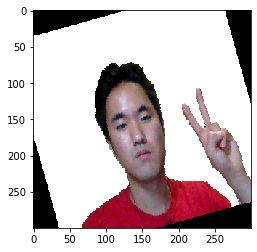

In [5]:
showNumpyAsImg(next(iter(train_loader))[0][0])

# Defining Network Architecture

In [6]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 15)
        self.conv2 = nn.Conv2d(6, 16, 15)
        self.pool = nn.MaxPool2d(5, 5)
        
        self.fc1 = nn.Linear(16*8*8, 300)
        self.fc2 = nn.Linear(300, 100)
        self.fc3 = nn.Linear(100, output_neurons)
        
        self.dropout = nn.Dropout(0.5)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        
        x = x.view(-1, 16*8*8)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

# Training The Network

In [7]:
model = CNN()
optimizer = optim.Adam(model.parameters(), lr = learning_rate, weight_decay = regularization)
trainNetwork(model, train_loader, val_loader, n_epochs, optimizer)

Epoch 1, Loss: 10.953, Validation Loss 3.315
Epoch 2, Loss: 9.223, Validation Loss 5.584
Epoch 3, Loss: 6.871, Validation Loss 7.174
Epoch 4, Loss: 5.852, Validation Loss 7.667
Epoch 5, Loss: 4.905, Validation Loss 8.000
Epoch 6, Loss: 4.232, Validation Loss 8.343
Epoch 7, Loss: 3.431, Validation Loss 9.708
Epoch 8, Loss: 3.002, Validation Loss 8.565
Epoch 9, Loss: 2.569, Validation Loss 10.131
Epoch 10, Loss: 2.784, Validation Loss 9.725
Epoch 11, Loss: 2.517, Validation Loss 9.012
Epoch 12, Loss: 2.217, Validation Loss 8.542
Epoch 13, Loss: 1.950, Validation Loss 9.144
Epoch 14, Loss: 1.829, Validation Loss 10.029
Epoch 15, Loss: 2.034, Validation Loss 9.542
Epoch 16, Loss: 1.818, Validation Loss 9.334


# Saving The Model

In [8]:
torch.save(model.state_dict(), f'saved_models/{model_name}_{batch_size}BS_{learning_rate}LR_{n_epochs}E')

# Evaluating The Model

In [10]:
model = CNN()
loadModel(model, f'{model_name}_{batch_size}BS_{learning_rate}LR_{n_epochs}E')
evaluateNetwork(model, train_loader)

[[57  0  0]
 [ 1 45  0]
 [ 0  0 47]]
              precision    recall  f1-score   support

           0    0.98276   1.00000   0.99130        57
           1    1.00000   0.97826   0.98901        46
           2    1.00000   1.00000   1.00000        47

    accuracy                        0.99333       150
   macro avg    0.99425   0.99275   0.99344       150
weighted avg    0.99345   0.99333   0.99333       150

[[51  0  0]
 [ 2 40  1]
 [ 0  0 56]]
              precision    recall  f1-score   support

           0    0.96226   1.00000   0.98077        51
           1    1.00000   0.93023   0.96386        43
           2    0.98246   1.00000   0.99115        56

    accuracy                        0.98000       150
   macro avg    0.98157   0.97674   0.97859       150
weighted avg    0.98062   0.98000   0.97980       150

[[53  0  2]
 [ 1 44  0]
 [ 0  0 50]]
              precision    recall  f1-score   support

           0    0.98148   0.96364   0.97248        55
           1    1.